In [1]:
import os
from hfpred.utils import get_project_root
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
import dataframe_image as dfi
pd.set_option("display.max_columns", None)

In [2]:
figures_path = get_project_root() / "output/figures"
if not os.path.isdir(figures_path):
    os.mkdir(figures_path)

tables_path = get_project_root() / "output/tables"
if not os.path.isdir(tables_path):
    os.mkdir(tables_path)

# Exploratory Data Analysis

## Data

In [3]:
df = pd.read_csv(
    get_project_root() / "data/heart.csv"
)

In [4]:
print(df.shape)
df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# na values for the whole df:
df.isna().sum().sum()

0

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# fpath = "../output/tables/data_desc_cont.png"
# dfi.export(df.describe(), fpath)

In [9]:
df.describe(include="object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [10]:
# fpath = "../output/tables/data_desc_cat.png"
# dfi.export(df.describe(include="object"), fpath)

## Categorical Data Check
Check categorical attributes are in the expected set as given by the data description:

In [11]:
cat_atts = {
    "Sex": ["M", "F"],
    "ChestPainType": ["TA", "ATA", "NAP", "ASY"],
    "FastingBS": [0,1],
    "RestingECG": ["Normal", "ST", "LVH"],
    "ExerciseAngina": ["Y", "N"],
    "ST_Slope": ["Up", "Flat", "Down"],
    "HeartDisease": [0,1]
}

for key in cat_atts.keys():
    assert set(df[key].unique()).issubset(cat_atts[key]), f"{key}'s values not in range"

## Categorical Data Distribution

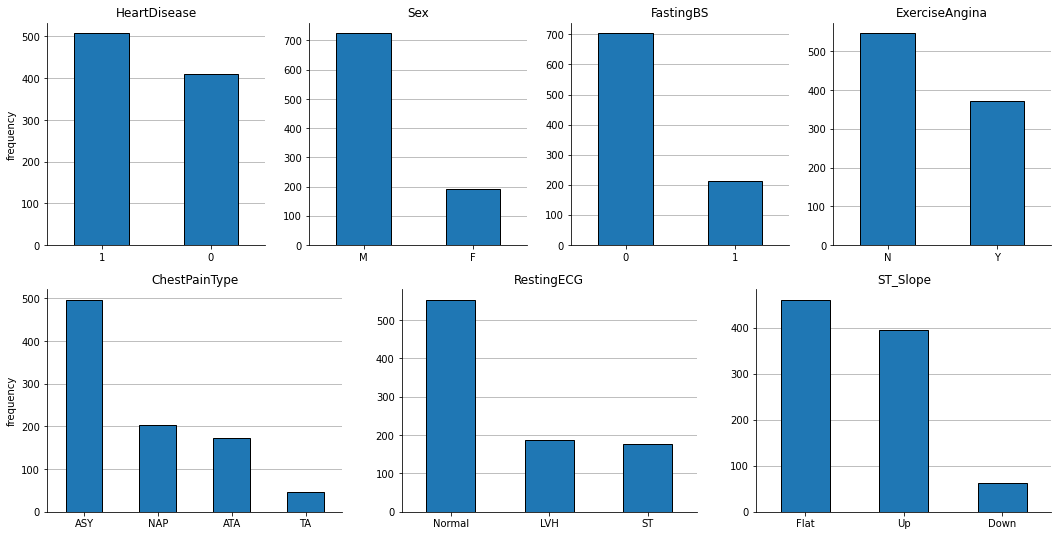

In [12]:
# plot categorical / binary attributes and target ('HeartDisease')

fig = plt.figure(figsize=(18,9))
ax1 = fig.add_subplot(241)
ax2 = fig.add_subplot(242)
ax3 = fig.add_subplot(243)
ax4 = fig.add_subplot(244)
ax5 = fig.add_subplot(234)
ax6 = fig.add_subplot(235)
ax7 = fig.add_subplot(236)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

for i, att in enumerate([
        "HeartDisease",
        "Sex",
        "FastingBS",
        "ExerciseAngina",
        "ChestPainType",
        "RestingECG",
        "ST_Slope"
    ]):
    df[att].value_counts().plot(
        kind="bar",
        ax=axes[i],
        rot=0,
        color="tab:blue",
        edgecolor="black",
    )
    axes[i].set_title(att)

for ax in [ax1, ax5]:
    ax.set_ylabel("frequency")

for ax in axes:
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_axisbelow(True)
    ax.grid(axis="y", which="major")
    
# fig.tight_layout()

In [13]:
# fig.savefig(get_project_root() / "output/figures/cat_dist.png")

## Continuous Data Distribution

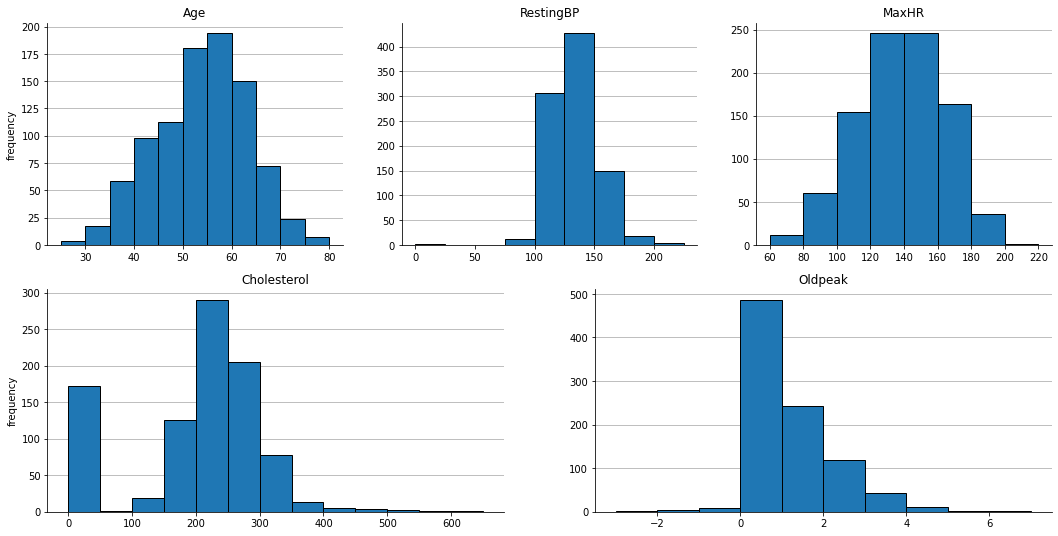

In [14]:
# plot categorical / binary attributes and target ('HeartDisease')

fig = plt.figure(figsize=(18,9))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(223)
ax5 = fig.add_subplot(224)
axes = [ax1, ax2, ax3, ax4, ax5]

bin_steps = {
    "Age": 5,
    "RestingBP": 25,
    "MaxHR": 20,
    "Cholesterol": 50,
    "Oldpeak": 1
}

for i, att in enumerate([
    "Age",
    "RestingBP",
    "MaxHR",
    "Cholesterol",
    "Oldpeak"
]):
    df[att].plot(
        kind="hist",
        bins=np.arange(
            (df[att].min() // bin_steps[att])*bin_steps[att],
            ((df[att].max() // bin_steps[att])+1)*bin_steps[att]+1,
            bin_steps[att]
        ),
        ax=axes[i],
        color="tab:blue",
        edgecolor="black",
    )
    axes[i].set_title(att)

for ax in axes:
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_axisbelow(True)
    ax.grid(axis="y", which="major")
    ax.set_ylabel("")

for ax in [ax1, ax4]:
    ax.set_ylabel("frequency")

In [15]:
# fig.savefig(get_project_root() / "output/figures/cont_dist.png")

### Zero Values
Check continuous attributes are non-zero where expected:

In [16]:
cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "OldPeak"]
zeros = pd.DataFrame(
    columns=[
        "\'zero\'_values",
    ],
    index=cols
)

for col in cols:
    try:
        zeros.at[col, "\'zero\'_values"] = df[col].value_counts()[0]
    except:
        zeros.at[col, "\'zero\'_values"] = np.nan

zeros


,'zero'_values
Age,NaN
RestingBP,1
Cholesterol,172
MaxHR,NaN
OldPeak,NaN


## Outliers

In [17]:
def boxplots(df):
    fig = plt.figure(figsize=(18,7))
    ax1 = fig.add_subplot(151)
    ax2 = fig.add_subplot(152)
    ax3 = fig.add_subplot(153)
    ax4 = fig.add_subplot(154)
    ax5 = fig.add_subplot(155)
    axes = [ax1, ax2, ax3, ax4, ax5]

    for i, att in enumerate([
        "Age",
        "RestingBP",
        "MaxHR",
        "Cholesterol",
        "Oldpeak"
    ]):
        sns.boxplot(
            ax=axes[i],
            y=df[att],
        )
        axes[i].set_xlabel(att)
        axes[i].set_ylabel("")
        # axes[i].spines[["top", "right"]].set_visible(False)
        axes[i].set_axisbelow(True)
        # axes[i].grid(axis="y", which="major")

    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
    plt.close()
    return fig

### Boxplots [Raw Data]

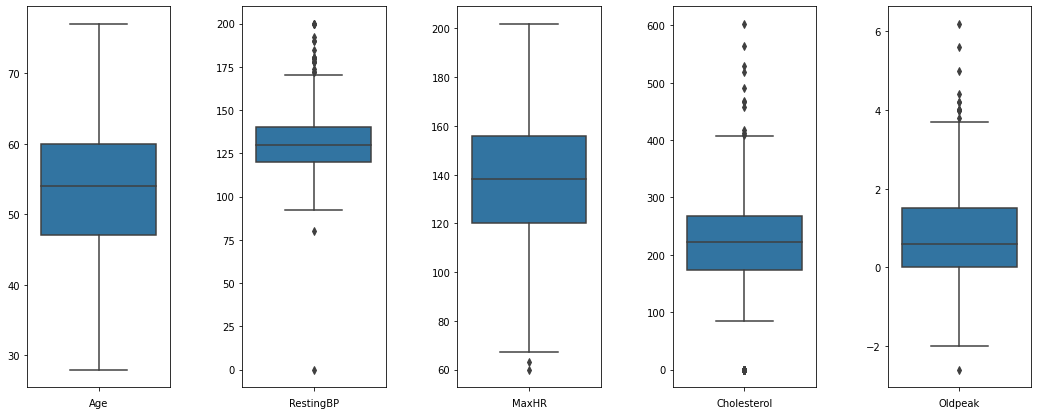

In [18]:
boxplots(df)

In [19]:
# fig = boxplots(df)
# fig.savefig(get_project_root() / "output/figures/cont_boxlots.png")

### Boxplots [Zeros Removed]

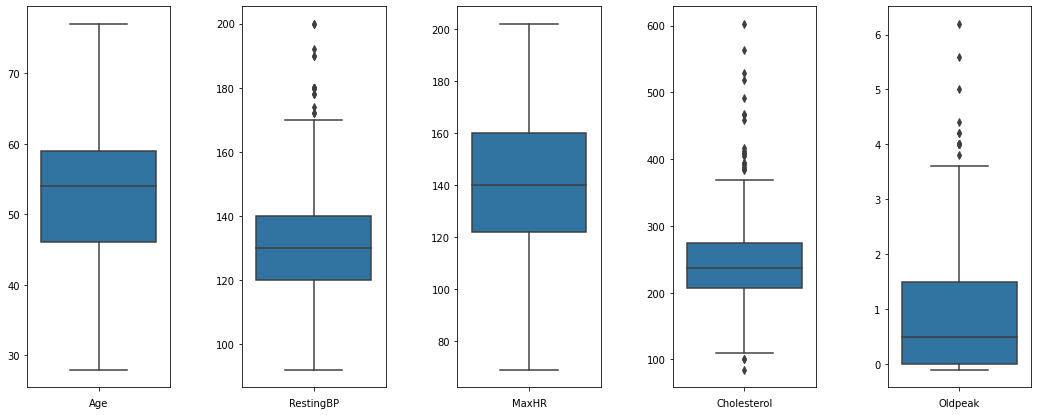

In [20]:
df_dropped_zero = df[
    (df["RestingBP"] != 0) &
    (df["Cholesterol"] != 0)
]

boxplots(df_dropped_zero)

In [21]:
# fig = boxplots(df_dropped_zero)
# fig.savefig(get_project_root() / "output/figures/cont_boxlots_dropped_zero.png")

## Temporarily Removing Outliers

In [22]:
# func to display class balance as df:
def disp_class_balance(df):
    bal = pd.DataFrame(
        df["HeartDisease"].value_counts()/len(df)
    ).rename(
        columns={"HeartDisease": "Class Balance"}
    )
    bal.index.name = "HeartDisease"
    display(bal)

In [23]:
# original class balance:
df_o = df.copy()
print(f"Original Dataset Length: {len(df_o)}")
disp_class_balance(df_o)

# remove zeros:
df_o = df_o[
    (df_o["RestingBP"] != 0) &
    (df_o["Cholesterol"] != 0)
]
print(f"Dataset Length, Zeros Removed: {len(df_o)}")
disp_class_balance(df_o)

# remove outliers for each attribute:
for att in ["Age", "RestingBP", "MaxHR", "Cholesterol", "Oldpeak"]:
    upper_lim = df_o.describe()[att]["75%"] + 1.5*(df_o.describe()[att]["75%"] - df_o.describe()[att]["25%"])
    lower_lim = df_o.describe()[att]["25%"] - 1.5*(df_o.describe()[att]["75%"] - df_o.describe()[att]["25%"])
    df_o = df_o[df_o[att] < upper_lim]
    df_o = df_o[df_o[att] > lower_lim]

print(f"Remaining Dataset Size, Outliers Removed: {len(df_o)}")
disp_class_balance(df_o)

Original Dataset Length: 918


,Class Balance
HeartDisease,
1,0.553377
0,0.446623


Dataset Length, Zeros Removed: 746


,Class Balance
HeartDisease,
0,0.522788
1,0.477212


Remaining Dataset Size, Outliers Removed: 681


,Class Balance
HeartDisease,
0,0.54185
1,0.45815


### Boxplots [Zeros Removed, Outliers Removed]

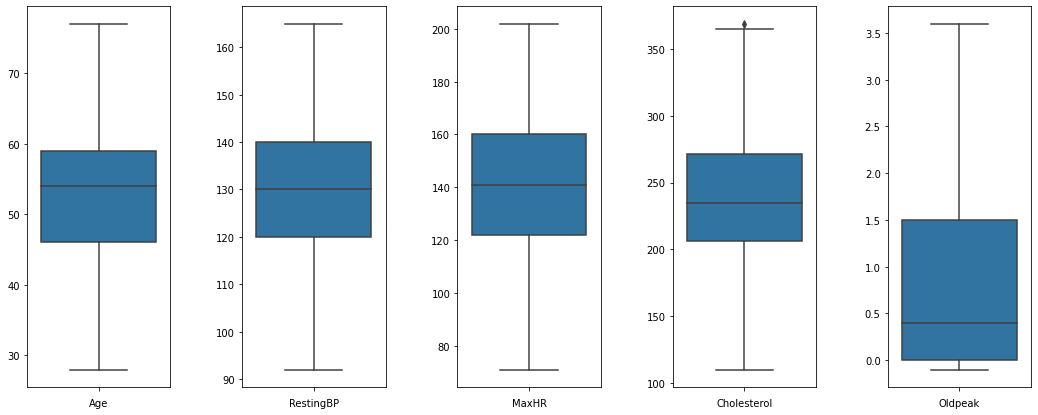

In [24]:
boxplots(df_o)

In [25]:
# fig = boxplots(df_o)
# fig.savefig(get_project_root() / "output/figures/cont_boxlots_outliers_removed.png")

## Correlation

In [26]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


/var/folders/ng/4x8hyf_s39b2rqzs184hl_lr0000gp/T/ipykernel_13128/3508394935.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df, ax=axes)


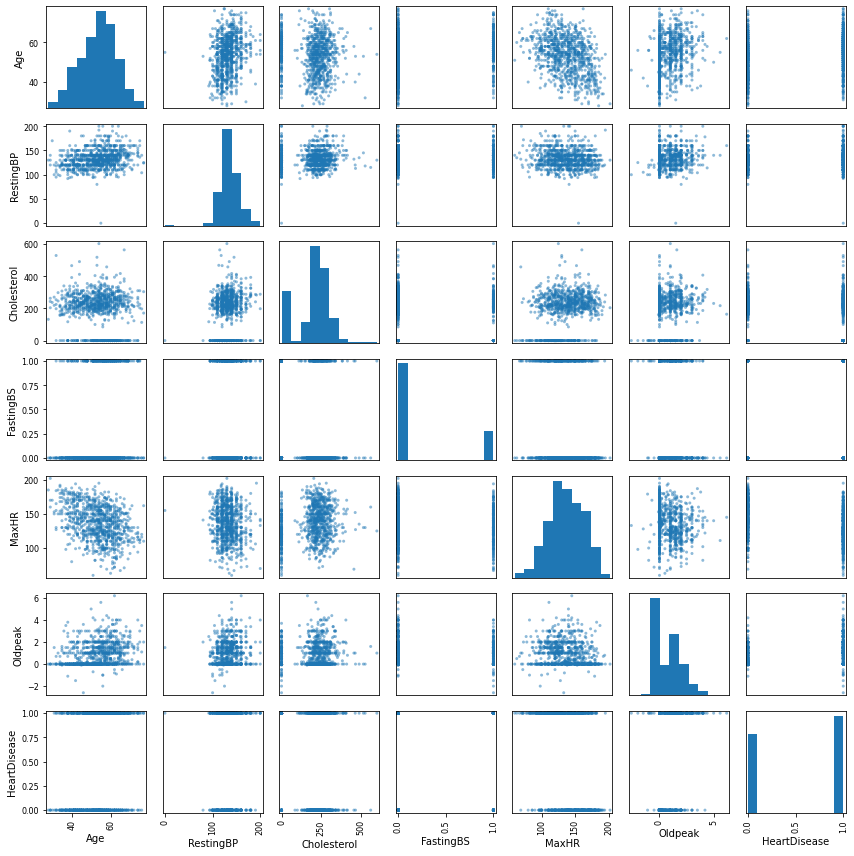

In [27]:
fig, axes = plt.subplots(figsize=(12,12))
scatter_matrix(df, ax=axes)
fig.tight_layout();

In [28]:
# fig.savefig(get_project_root() / "output/figures/scatter_matrix.png")

### Correlation [Raw Data]

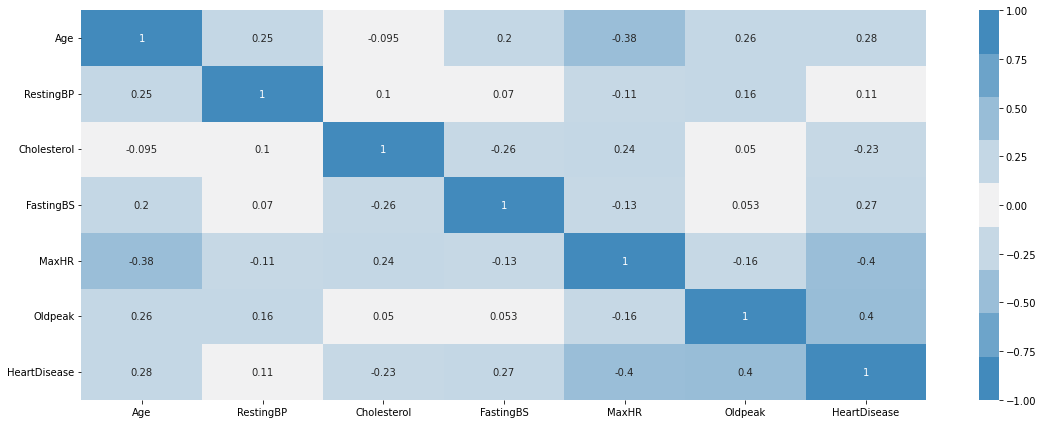

In [29]:
corrMat_raw = df.corr()
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

ax = sns.heatmap(
    corrMat_raw,
    annot=True,
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(240, 240, s=80, l=55, n=9),
)

fig.tight_layout();

In [30]:
# fig.savefig(get_project_root() / "output/figures/corr_raw.png")

In [31]:
raw_corr_target = pd.DataFrame(corrMat_raw["HeartDisease"]).rename(columns={"HeartDisease": "Raw Data"}).transpose()

## Correlation After pre-Processing

### Correlation [Zeros Removed]

In [32]:
df_dropped_zero = df[
    (df["RestingBP"] != 0) &
    (df["Cholesterol"] != 0)
]

len(df_dropped_zero)

746

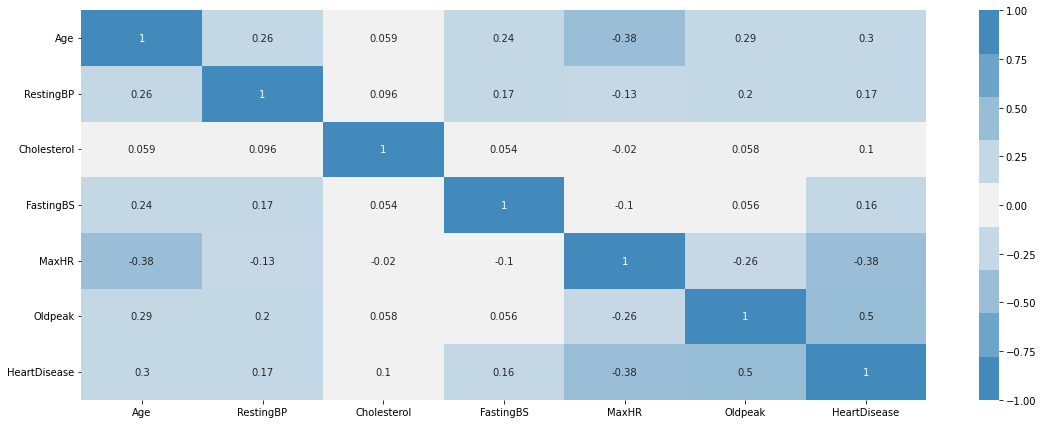

In [33]:
corrMat_no_zero = df_dropped_zero.corr()
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

ax = sns.heatmap(
    corrMat_no_zero,
    annot=True,
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(240, 240, s=80, l=55, n=9),
)

fig.tight_layout();

In [34]:
# fig.savefig(get_project_root() / "output/figures/corr_no_zero.png")

In [35]:
no_zero_corr_target = pd.DataFrame(corrMat_no_zero["HeartDisease"]).rename(columns={"HeartDisease": "Dropped Zeros"}).transpose()

### Correlation [Zeros Imputed]

In [36]:
df_imp = df.copy()
df_imp["RestingBP"] = df_imp["RestingBP"].replace(0,df_imp["RestingBP"].replace(0,np.nan).mean())
df_imp["Cholesterol"] = df_imp["Cholesterol"].replace(0,df_imp["Cholesterol"].replace(0,np.nan).mean())

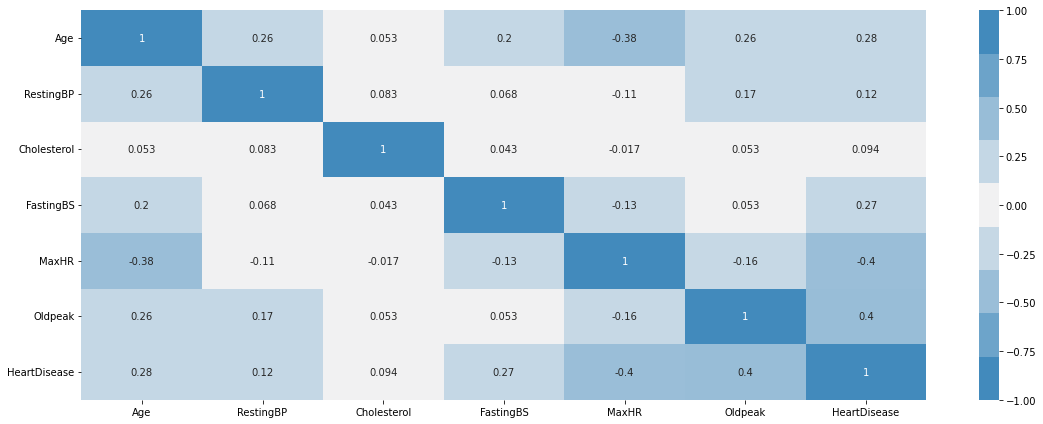

In [37]:
corrMat_imp = df_imp.corr()
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

ax = sns.heatmap(
    corrMat_imp,
    annot=True,
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(240, 240, s=80, l=55, n=9),
)

fig.tight_layout();

In [38]:
# fig.savefig(get_project_root() / "output/figures/corr_zero_imp.png")

In [39]:
imp_corr_target = pd.DataFrame(corrMat_imp["HeartDisease"]).rename(columns={"HeartDisease": "Mean Imputed"}).transpose()

### Comparing Correlation with Target

In [40]:
corr = pd.concat([
    raw_corr_target,
    no_zero_corr_target,
    imp_corr_target
])
corr.columns = pd.MultiIndex.from_product([["Attribute Pearson Correlation with Target"], corr.columns])
corr

Attribute Pearson Correlation with Target                        \
                                                    Age RestingBP Cholesterol   
Raw Data                                       0.282039  0.107589   -0.232741   
Dropped Zeros                                  0.298617  0.173242    0.103866   
Mean Imputed                                   0.282039  0.117938    0.094071   

                                                          
              FastingBS     MaxHR   Oldpeak HeartDisease  
Raw Data       0.267291 -0.400421  0.403951          1.0  
Dropped Zeros  0.160594 -0.377212  0.495696          1.0  
Mean Imputed   0.267291 -0.400421  0.403951          1.0

In [41]:
# fpath = "../output/tables/corr.png"
# dfi.export(corr, fpath)

### Correlation [One-Hot-Encoded, Raw Data]

In [42]:
enc_cols = [
    "Sex",
    "ChestPainType",
    "RestingECG",
    "ExerciseAngina",
    "ST_Slope"
]

ohe_df = pd.get_dummies(df)
cols = list(ohe_df.columns)
cols.pop(cols.index("HeartDisease"))
ohe_df = ohe_df[cols + ["HeartDisease"]]

ohe_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0


In [43]:
# fpath = "../output/tables/ohe_head.png"
# dfi.export(ohe_df.head(), fpath)

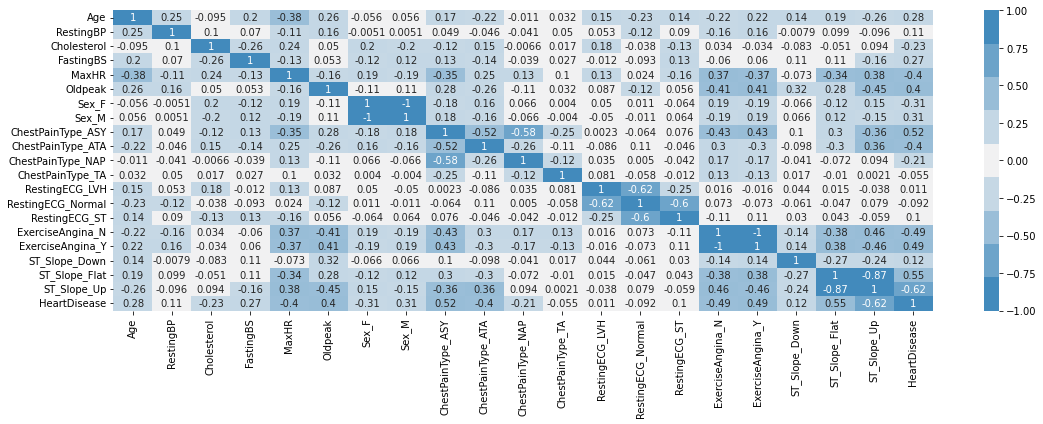

In [44]:
corrMat_ohe = ohe_df.corr()
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

ax = sns.heatmap(
    corrMat_ohe,
    annot=True,
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(240, 240, s=80, l=55, n=9),
)

fig.tight_layout();

In [45]:
# fig.savefig(get_project_root() / "output/figures/corr_ohe_raw.png")

In [46]:
ohe_corr_target_raw = pd.DataFrame(corrMat_ohe["HeartDisease"]).rename(columns={"HeartDisease": "Raw Data"})
# ohe_corr_target_raw

### Correlation [One-Hot-Encoded, Zeros Removed]

In [47]:
enc_cols = [
    "Sex",
    "ChestPainType",
    "RestingECG",
    "ExerciseAngina",
    "ST_Slope"
]

ohe_df = pd.get_dummies(df_dropped_zero)
cols = list(ohe_df.columns)
cols.pop(cols.index("HeartDisease"))
ohe_df = ohe_df[cols + ["HeartDisease"]]

# ohe_df.head()

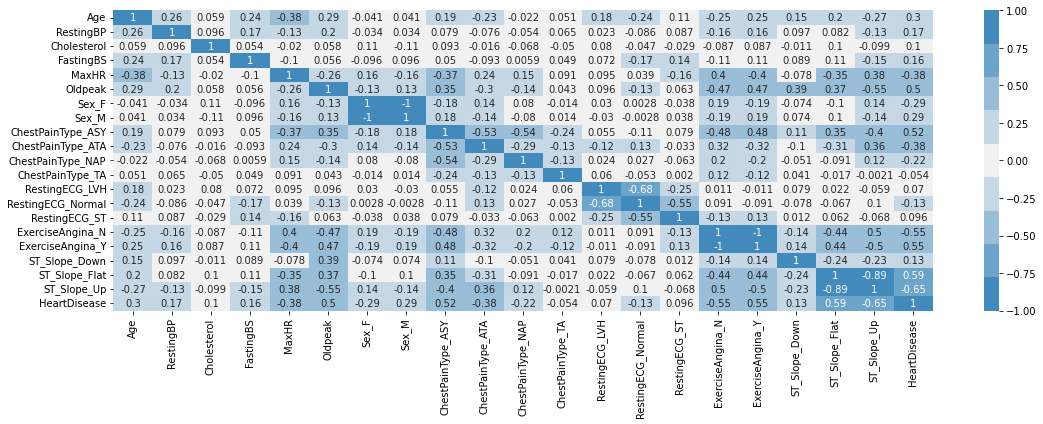

In [48]:
corrMat_ohe = ohe_df.corr()
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

ax = sns.heatmap(
    corrMat_ohe,
    annot=True,
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(240, 240, s=80, l=55, n=9),
)

fig.tight_layout();

In [49]:
# fig.savefig(get_project_root() / "output/figures/corr_ohe_no_zero.png")

In [50]:
ohe_corr_target_dropped_zeros = pd.DataFrame(corrMat_ohe["HeartDisease"]).rename(columns={"HeartDisease": "Zeros Removed"})
# ohe_corr_target_dropped_zeros

### Correlation [One-Hot-Encoded, Outliers Removed]

In [51]:
enc_cols = [
    "Sex",
    "ChestPainType",
    "RestingECG",
    "ExerciseAngina",
    "ST_Slope"
]

ohe_df = pd.get_dummies(df_o)
cols = list(ohe_df.columns)
cols.pop(cols.index("HeartDisease"))
ohe_df = ohe_df[cols + ["HeartDisease"]]

# ohe_df.head()

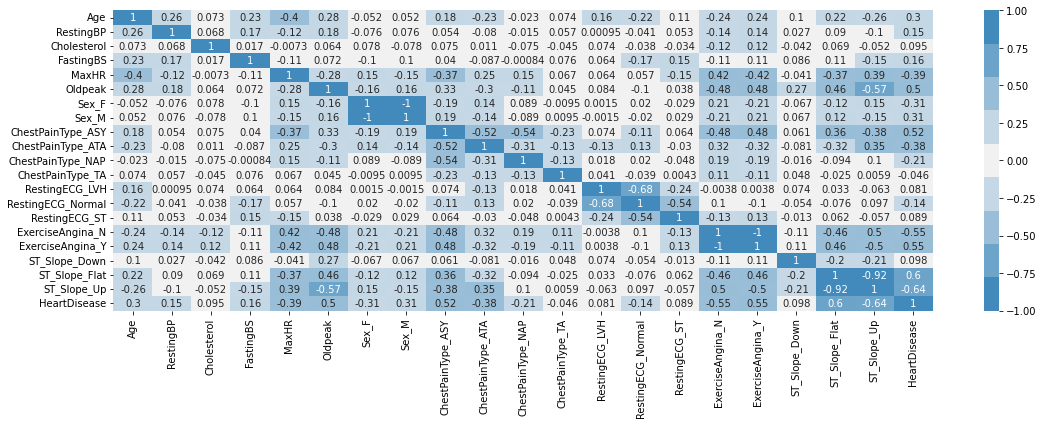

In [52]:
corrMat_ohe = ohe_df.corr()
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

ax = sns.heatmap(
    corrMat_ohe,
    annot=True,
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(240, 240, s=80, l=55, n=9),
)

fig.tight_layout();

In [53]:
# fig.savefig(get_project_root() / "output/figures/corr_ohe_no_zero_no_outlier.png")

In [54]:
ohe_corr_target_dropped_outliers = pd.DataFrame(corrMat_ohe["HeartDisease"]).rename(columns={"HeartDisease": "Outliers Removed"})
# ohe_corr_target_dropped_outliers

In [55]:
ohe_corr = ohe_corr_target_raw.join(ohe_corr_target_dropped_zeros).join(ohe_corr_target_dropped_outliers)
ohe_corr.columns = pd.MultiIndex.from_product([["Pearson Correlation with Target"], ohe_corr.columns])
ohe_corr

Pearson Correlation with Target                \
                                         Raw Data Zeros Removed   
Age                                      0.282039      0.298617   
RestingBP                                0.107589      0.173242   
Cholesterol                             -0.232741      0.103866   
FastingBS                                0.267291      0.160594   
MaxHR                                   -0.400421     -0.377212   
Oldpeak                                  0.403951      0.495696   
Sex_F                                   -0.305445     -0.292779   
Sex_M                                    0.305445      0.292779   
ChestPainType_ASY                        0.516716      0.522982   
ChestPainType_ATA                       -0.401924     -0.375634   
ChestPainType_NAP                       -0.212964     -0.222146   
ChestPainType_TA                        -0.054790     -0.053765   
RestingECG_LVH                           0.010670      0.069599   
RestingECG_Normal                       -0.091580     -0.133255   
RestingECG_ST                            0.102527      0.095921   
ExerciseAngina_N                        -0.494282     -0.551834   
ExerciseAngina_Y                         0.494282      0.551834   
ST_Slope_Down                            0.122527      0.132193   
ST_Slope_Flat                            0.554134      0.591554   
ST_Slope_Up                             -0.622164     -0.653759   
HeartDisease                             1.000000      1.000000   

                                    
                  Outliers Removed  
Age                       0.301930  
RestingBP                 0.154579  
Cholesterol               0.095451  
FastingBS                 0.161255  
MaxHR                    -0.391408  
Oldpeak                   0.495720  
Sex_F                    -0.308600  
Sex_M                     0.308600  
ChestPainType_ASY         0.519843  
ChestPainType_ATA        -0.377370  
ChestPainType_NAP        -0.211900  
ChestPainType_TA         -0.046012  
RestingECG_LVH            0.081077  
RestingECG_Normal        -0.136877  
RestingECG_ST             0.088913  
ExerciseAngina_N         -0.546607  
ExerciseAngina_Y          0.546607  
ST_Slope_Down             0.097993  
ST_Slope_Flat             0.604637  
ST_Slope_Up              -0.643313  
HeartDisease              1.000000

In [56]:
# fpath = "../output/tables/ohe_corr.png"
# dfi.export(ohe_corr, fpath)

todo:
* in preprocessing only need one of M/F and one of ExerciseAngina_Y/ExerciseAngina_N
* split train/val/test
* preprocess train and val but preocess test in final pipeline